In order to successfully complete this assignment you must do the required reading, watch the provided videos and complete all instructions.  The embedded Google form must be entirely filled out and submitted on or before **11:59pm on Monday October 28**.  Students must come to class the next day prepared to discuss the material covered in this assignment. answer

# Pre-Class Assignment: Principal Component Analysis

### Goals for today's pre-class assignment 

</p>

1. [Intuition about principal component analysis](#Intuition_about_principal_component_analysis)
2. [The Math Behind PCA](#The_Math_Behind_PCA)
2. [Example Application: The Iris data set](#Example_Application:_The_Iris_data_set)
4. [Assignment wrap-up](#Assignment_wrap-up)

---
<a name="Intuition_about_principal_component_analysis"></a>
# 1. Intuition about principal component analysis

The following videos (Developed at Georgia Tech) are to help you gain an understanding and intuition about principal component analysis (PCA). PCA is one of main techniques used in data science, exploratory data analysis and modeling.

You can watch the entire course here:

https://youtu.be/Ki2iHgKxRBo?list=PLAwxTw4SYaPl0N6-e1GvyLp5-MUMUjOKo

It's really good but we don't have time to cover it all. 


In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("kw9R0nD69OU",width=640,height=360)

&#9989; <font color=red>**QUESTION:**</font> PCA is trying to find the directions with maximal _ _ _ _ _? 

difference

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("_nZUhV-qhZA",width=640,height=360)

&#9989; <font color=red>**QUESTION:**</font> This video introduces a concept of "features" in a dataset. What are the names of the two original features represented in the graph shown in this video. 

Put your answer to the above question here.

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("kuzJJgPBrqc",width=640,height=360)

&#9989; <font color=red>**QUESTION:**</font> If the eigenvalue of a dimension is zero? 

Put the answer to the above question here. 

----
<a name="The_Math_Behind_PCA"></a>
# 2. The Math Behind PCA
The principal components represents a basis that "best" describes the data. The basis vectors describe the largest variation of the data. 

For example: lets pretend this data came from some sort of 2D experiment where the x axis is one measurement and the y axis is a second.  

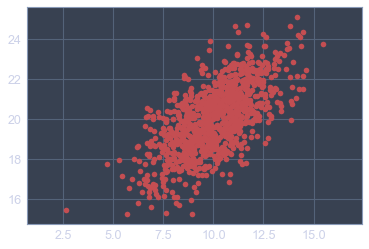

[[12.25646593 10.54260623  8.45598809 ... 10.36886831 10.24455159
   7.65152375]
 [21.84428444 18.31364231 20.6014225  ... 22.13602761 18.02113106
  15.3022267 ]
 [ 1.          1.          1.         ...  1.          1.
   1.        ]]


In [16]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sp
sp.init_printing(use_unicode=True)

#Make a random point cloud.  This cloud uses a Gaussian distribution 
# with a covariance matrix 5 times bigger in the y direction.  
x, y = np.random.multivariate_normal([0, 0], [[1, 0], [0, 5]], 1000).T;
P = np.matrix([x, y, np.ones(len(x))]);

#Apply a 45 degree rotation to the random data and shift it in the $x,y$ plane using a 
# simple 2D transformation matrix:
theta = -np.pi/4
dx = 10
dy = 20
T = np.matrix([[np.sin(theta), -np.cos(theta), dx], [np.cos(theta), np.sin(theta), dy], [0,0,1]])
P = T*P

#remove the last row
P = P[0:3,:]

#Plot the data
plt.plot(P[0].tolist(), P[1].tolist(), "or");
plt.axis('equal');
plt.show()
print(P)


### STEP 1: Center the Data

&#9989; <font color=red>**DO THIS:**</font> Center the data. Lets call this centered matrix of points $A$. The first step is to center the data about the origin.  Calculate the centroid of this 2D data and shift all of the points such that the centroid is moved to zero. Plot your shifted data. 

**HINT for Fall 2019 students**: this shift requires finding the average of the data and then subtracting that avaerage similar to the first homework.

In [12]:
#Put your code here
A = P - P.mean(axis=1)
# A = A[:2]
A

matrix([[ 1.83349887, -1.40705361,  0.59969131, ..., -1.23290412,
          2.19197906,  0.63284958],
        [ 0.02027113, -3.79550323, -2.30844509, ..., -1.20741817,
          3.49444394, -0.77077799],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])

### Step 2: Calculate the "Covariance Matrix"

&#9989; <font color=red>**DO THIS:**</font> Calculate "covariance matrix" by multiplying the data $C = AA^T$. Note this should be a $ 2 \times 2$ matrix.

In [6]:
#put your code here
C = A * A.T
C

matrix([[2928.41380075, 1938.62302597,    0.        ],
        [1938.62302597, 2991.16315651,    0.        ],
        [   0.        ,    0.        ,    0.        ]])

### Step 3: Calculate the Eigenvalus and Eigenvectors of $C$

&#9989; <font color=red>**DO THIS:**</font> Calculate the eigenvalues and eigenvectors of $C$

In [7]:
#Put your code here
vals,vec = np.linalg.eig(C)
vals,vec

(array([1020.91158537, 4898.6653719 ,    0.        ]),
 matrix([[-0.71280498, -0.70136229,  0.        ],
         [ 0.70136229, -0.71280498,  0.        ],
         [ 0.        ,  0.        ,  1.        ]]))

The eigenvalues represent the relative contribution of each eigenvector. Note, if you did this correctly the second eigenvalue should be five times the first. 

&#9989; <font color=red>**DO THIS:**</font> Plot the eigenvectors on the centered data. 

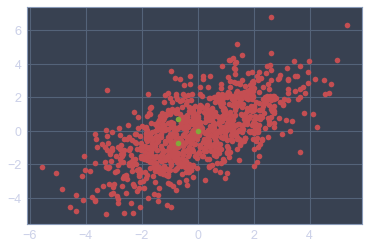

In [17]:
plt.plot(A[0].tolist(), A[1].tolist(), "or")
plt.plot(vec[0,:].tolist(), vec[1,:].tolist(), "og")
plt.show()

&#9989; <font color=red>**Extra Work:**</font> Shift the eigenvectors to be centered at the original data centroid and plot the results:

In [ ]:
# Put your answer to the above here.

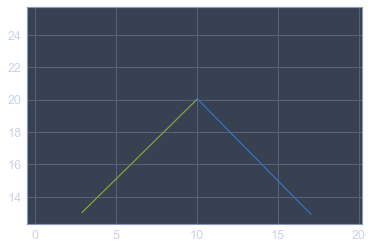

In [19]:
plt.plot(P[0].tolist(), P[1].tolist(), 'x', color='r');
plt.axis('equal');

c = P.mean(axis=1)

mx=c[0,0]
my=c[1,0]
plt.plot([ mx, mx+vec[0,0]*10], [my,my+vec[0,1]*10], color='g');
plt.plot([ mx, mx+vec[1,0]*10], [my,my+vec[1,1]*10], color='b');

&#9989; <font color=red>**QUESTION 4:**</font> How can we use Principal Component Analysis?

we can use PCA to find the best line of fit

---
<a name="Example_Application:_The_Iris_data_set"></a>
# 3. Example Application: The Iris data set

The iris dataset contains measurements for 150 iris flowers from three different species. 

In [22]:
%matplotlib inline
# First things first. Let's import some of the modules we'll use

import numpy as np

import scipy.linalg

import sklearn
import sklearn.decomposition as dec
import sklearn.datasets as datasets

import matplotlib.pyplot as plt


In [23]:
iris = datasets.load_iris()
data = iris.data
target = iris.target
print(data.shape)

(150, 4)


The three classes in the Iris dataset are represented by numbers in the 'target' vector:

    1. Iris-setosa (n=50)
    2. Iris-versicolor (n=50)
    3. Iris-virginica (n=50)

There are four measurements (features) for each flower in the  'data' matrix:    
    1. sepal length in cm
    2. sepal width in cm
    3. petal length in cm
    4. petal width in cm
    
Example:

![Image of flower](http://nbviewer.jupyter.org/github/rasbt/pattern_classification/blob/master/Images/iris_petal_sepal.png)

**Our Goal:** Find a set of features that are better than the RAW features.  We will use PCA to find axes that make it easer to separate the data into classes.  

### Step A: Try to visualize the features by plotting them.

&#9989; <font color=red>**QUESTION:**</font> Modify the following code to draw a scatterplot of the data for gust the first and second axes of the data matrix (index 0 and 1).  Hint: use a similar vector notation as step c.

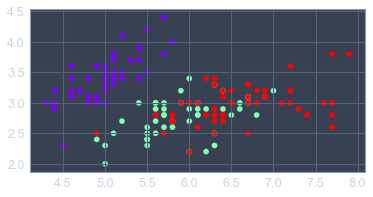

In [28]:
plt.figure(figsize=(6,3));

# STOP!!!! : Please complete the line of code below to do a scatter plot with respect to the first two variables of the data

# plt.scatter(data[0].tolist(),data[1].tolist(), c=target, s=30, cmap=plt.cm.rainbow);
plt.scatter(data[:,0].tolist(),data[:,1].tolist(), c=target, s=30, cmap=plt.cm.rainbow);

If done correctly the above should show different color dots for each of the different iris types.  As you can see, the classes do not separate clearly. Perhaps there are two directions that separate the data?

### Step B: Transform the data in terms of its principal components
Now we will use a PCA algorithm. Fortunately there is a simple PCA function available in the sklearn module. 

In [25]:
pca = dec.PCA()
pca_data = pca.fit_transform(data)

Out of curiosity. print the eigenvalues.  Remember from the video that low eigenvalues indicate less information. Big eigenvalues indicate more information.

In [26]:
print(pca.explained_variance_)

[4.22824171 0.24267075 0.0782095  0.02383509]


### Step C: Now plot the transformed data in terms of its first two principal components

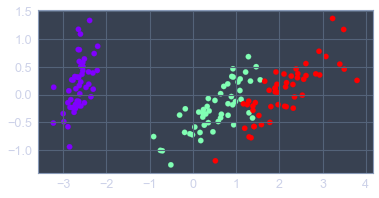

In [27]:
plt.figure(figsize=(6,3));
plt.scatter(pca_data[:,0], pca_data[:,1], c=target, s=30, cmap=plt.cm.rainbow);

&#9989; <font color=red>**QUESTION:**</font> Describe in words the differences between the graphs from Step A and Step C.  They are representing the same data.  Why would we prefer to use the features in step C?

The features in step C are more grouped together and separate. 

&#9989; <font color=red>**DO THIS:**</font> Review the steps for Machine Learning in the previous pre-class assignment. See if you can apply all of the steps to only the first two vectors of data.  If this is too hard, do not worry, just see what you can figure out and come to class to talk about it?

In [ ]:
#Put your code here.

----

<a name="Assignment_wrap-up"></a>
# 3. Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

[Direct Link to Google Form](https://cmse.msu.edu/cmse314-pc-survey)


If you have trouble with the embedded form, please make sure you log on with your MSU google account at [googleapps.msu.edu](https://googleapps.msu.edu) and then click on the direct link above.

&#9989; <font color=red>**Assignment-Specific QUESTION:**</font> There is no Assignment specific question for this notebook. You can just say "none".

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font>  Summarize what you did in this assignment.

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font>  What questions do you have, if any, about any of the topics discussed in this assignment after working through the jupyter notebook?

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font>  How well do you feel this assignment helped you to achieve a better understanding of the above mentioned topic(s)?

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font> What was the **most** challenging part of this assignment for you? 

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font> What was the **least** challenging part of this assignment for you? 

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font>  What kind of additional questions or support, if any, do you feel you need to have a better understanding of the content in this assignment?

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font>  Do you have any further questions or comments about this material, or anything else that's going on in class?

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font> Approximately how long did this pre-class assignment take?

Put your answer to the above question here

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse314-pc-survey" 
	width="100%" 
	height="1000px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---------
### Congratulations, we're done!

To get credit for this assignment you must fill out and submit the above Google From on or before the assignment due date.

### Course Resources:

- [Syllabus](https://docs.google.com/document/d/e/2PACX-1vRAFflQFXulzSMwWcyr_SEd6piEzHLWTjGkwx49D6H6FZxQGWEHrKMDiIaV3Pu6adAQ-wjlg3IXptjM/pub)
- [Preliminary Schedule](https://docs.google.com/spreadsheets/d/e/2PACX-1vS5UoXTmHDnF99kTHOiHIWuOBG7iqts-8EsbpoJHayRTB7F8eI4SfMR0MVp7dt0RQrMkNTVW6M1x-wY/pubhtml)
- [Course D2L Page](https://d2l.msu.edu/d2l/home/832635)

&#169; Copyright 2019,  Michigan State University Board of Trustees